# Problem and Background

In the summer of 2021 The Toronto City Council commissioned a detailed analysis of the city infrastructure. The goal is to identify future areas of investment aiming to improve general "liveability" for Toronto's residents and furthermore make the city more attractive to global talent - especially important considering the growing start-up scene.

This task was divided into several priority areas. The first, which will be the focus of this analysis, is to determine how well parks and green areas have been integrated into the city infrastructure as various research has shown that: 

_"City parks provide access to recreational opportunities, increase property values, spur local economies, combat crime, and protect cities from environmental impact."_   
Source: https://cityparksalliance.org/about-us/why-city-parks-matter/

Furthermore, according to the latest report from The Intergovernmental Panel on Climate Change (IPCC, https://www.ipcc.ch/report/ar6/wg1/) focusing on urban areas is essential in preparing for climate change:

_"For cities, some aspects of climate change may be amplified, including heat (since urban areas are usually warmer than their surroundings), flooding from heavy precipitation events and sea level rise in coastal cities."_  
Source: https://www.ipcc.ch/2021/08/09/ar6-wg1-20210809-pr/

According to various rankings on the world's greenest cities, Toronto is unfortunately nowhere to be found, which could be an indication that this focus area has room for improvement! Examples include:  

1) https://www.afar.com/magazine/greenest-cities-in-the-world-in-2020  
2) https://assets.new.siemens.com/siemens/assets/api/uuid:cf26889b-3254-4dcb-bc50-fef7e99cb3c7/gci-report-summary.pdf. 

It is however not straightforward to simply increase green areas wherever possible: 

_"Park planning and design represents a complex process that begins with the decision to create a park and ends with the final construction and subsequent use of the park. A design context, design concepts study is an important step in park development which should precede the development of the site plan and working drawings. Design context examines community and resident needs, potential user demand, and site analysis […]."_  
Source: https://js.sagamorepub.com/jpra/article/view/1849

_“Typically, a park project gets started through a demonstrated need from surveys of community members, and other public input that is incorporated into the city’s Comprehensive Plan and the Parks and Recreation Open Space (PROS) Plan,” […]_  
Source: https://www.nrpa.org/parks-recreation-magazine/2017/march/from-concept-to-reality/

All in all, there seems to be valid support in arguing that the further development of parks and green areas in Toronto needs to be prioritized. The question is of course where to start. A survey of community members, as suggested above could yield helpful information. However, first of all this would require some background analysis in order for the questions be structured in a way that would render enough useful information. Secondly, the results need to be seen in context in order to determine the highest return on investment. Hence, it has been suggested to start with a benchmarking analysis comparing Toronto to a similar city known for its focus on green urban areas. For this analysis, Berlin has been chosen. It consistently ranks in the top of the greenest cities worldwide (see links above), is of similar size (although slightly bigger) and like Toronto also has a diverse population and a growing start-up scene. 

# Data and Problem-solving

The analysis and comparison of Toronto and Berlin will be based on the "venues" by neighbourhood as listed by 
Foursquare's location data. 

Both cities compromise a very high number of neighbourhoods as defined by postal code, which should make it possible to generate data detailed enough for a thorough analysis of the infrastructure.  It should be acknowledged that the postal code system differs between the cities, hence the neighbourhoods might be of varying sizes. Nevertheless this deemed to be an acceptable approach for a first-round analysis considering time and resources needed.

Postal codes for both cities are widely available via public sources. For our project the following sources have been selected - a quick crosscheck with other information providers could validate the quality of the information listed here: 

Toronto:  https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M  
Berlin:  https://www.dasoertliche.de/Themen/Postleitzahlen/Berlin.html

These sources were used to provide input for the Foursquare API in order to identify the venues by postal code (neighbourhood):

_"Foursquare summarizes data from thousands of references, incorporates validation and user-generated content from app and Super Users, and checks our POI against geographic assets"_  
Source: https://foursquare.com/products/places/

Although auto-generated content should always be handled with care, it is assumed that Foursquare - one of the most widely used location service providers - overall will show a true picture of city infrastructure. Furthermore, the venues identified cover a large number of categories, ranging from stores and restaurants to museums and stadiums. These categories, although not complete, are highly detailed and focus on some of the main characteristics of what makes up local communities. Hence the Foursquare venues seem adequate for our analysis. 

The Foursquare venue information was then used to only select neighbourhoods which included "park" for further analysis. However, no further criteria such as the size of the park was taken into account. This might be an important factor to be considered in future analyses. 

The dataset was clustered using algorithms from the Scikit-Learn library, a widely used machine learning library utilized by companies such as Microsoft and Fujitsu (https://scikit-learn.org/stable/). It was initially developed by David Cournapeau as a Google project (https://en.wikipedia.org/wiki/Scikit-learn).

The results were subsequently visualised for interpretation and recommendations for next steps.

# Methodology

The analytical process consist of the following stages - each stage was carried out for the Toronto and Berlin datasets respectively (the code is using the same headlines):


1. Webscraping: Retrieving datasets on postal codes and create dataframes  
    a. Retrieving information with the "request" and "beautifulsoap" libraries. Finding reliable sources through research with a complete table of postal codes for Toronto and Berlin.  
    b. Creating dataframes - adjusting loops for each particular table and checking that the correct information was retrieved. 
    
    After carrying out these steps on our datasets for Toronto and Berlin, the dataframes to be used for the analysis look like this (examples):
    
    Toronto:
    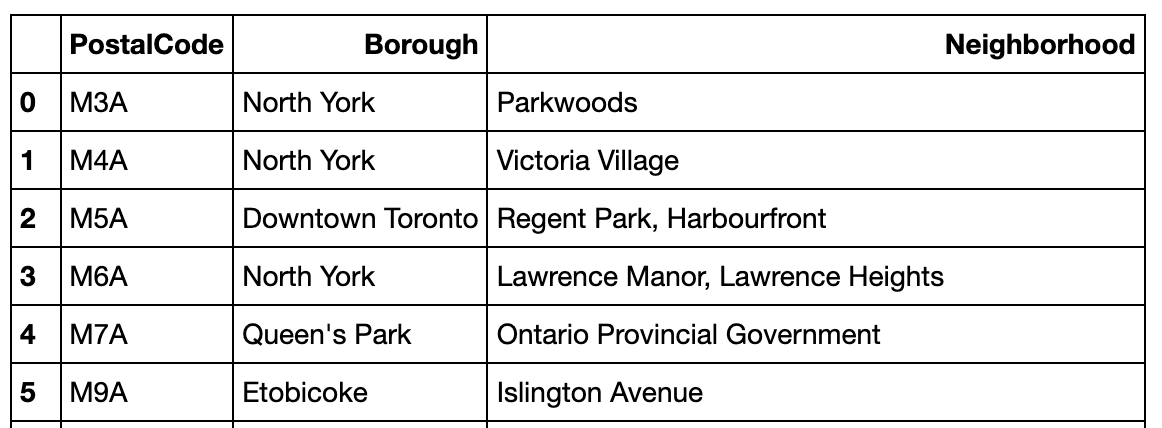
    
    Berlin:
    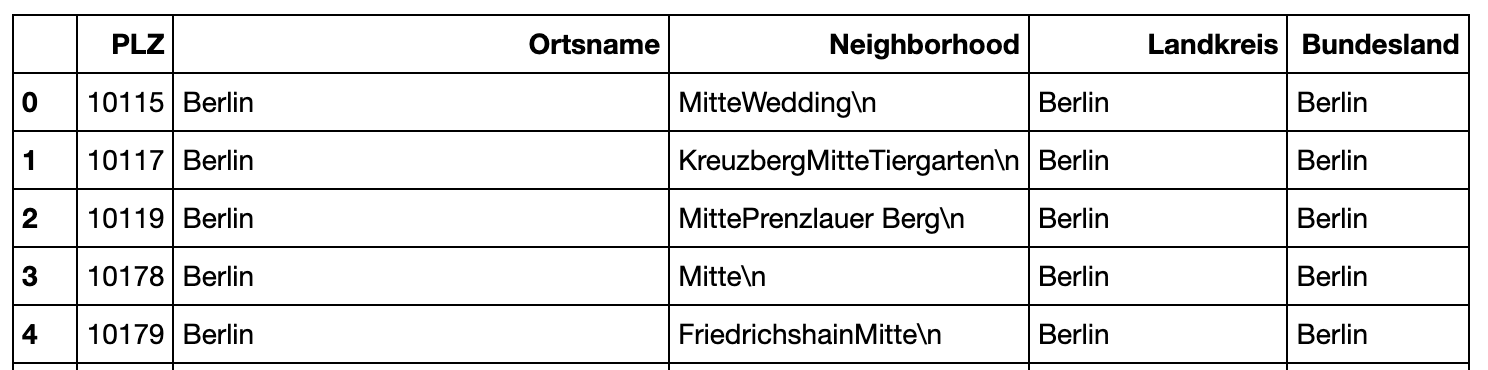
    
     

2. Adding geo tags with Foursquare:  
    a. Adding location data with the Foursquare API "geocoder" to each postal code in the dataframes.  
    b. Adding venue information by postal code with the Forsquare API "getNearbyVenues" and grouping by neighbourhood.
    
    After these steps have been completed these are the dataframes updated with the Foursquare information (examples):
    
    Toronto:
    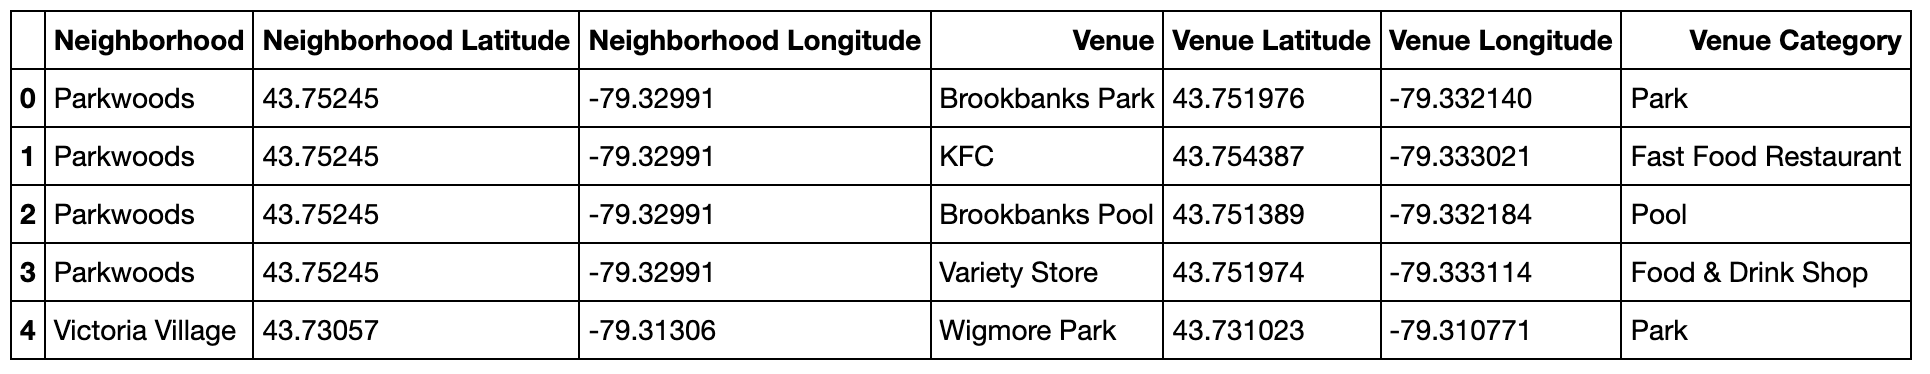
    
    Berlin:
    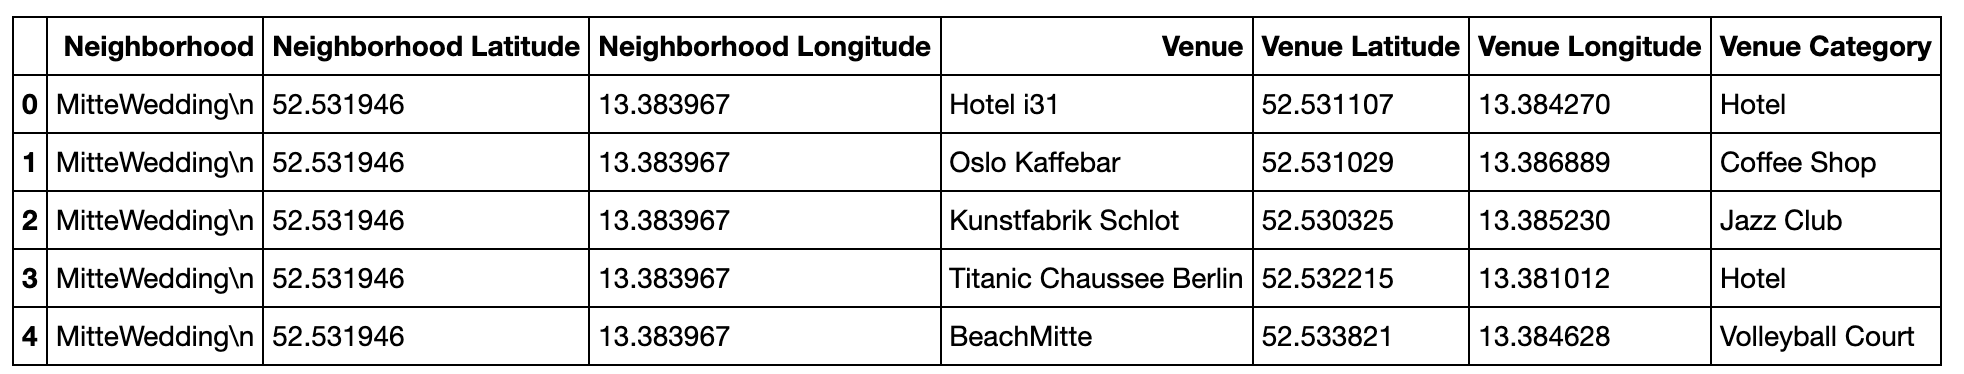


3. Formatting and filtering dataframes  
    a. Creating table with dummy variables grouped by neighborhood.  
    b. Reviewing the complete list of venue categories to identify relevant venue. Filtering for "park" and saving results to dataframes.  
    c. Reviewing and comparing size of dataframes for the two cities to ensure that the datasets seem as expected (plausibility check): Diverse with a high number of categories shown.
 
 
4. Clustering those neighbourhoods filtered to only include parks with Density-based Clustering algorithm (DBSCAN) using the Scikit-Learn package:  
    a. First KMeans was set to three clusters for a later comparison with DBSCAN. DBSCAN was used due to its ability estimate the number of clusters, resistance to noise and handling of clusters of various shapes. This is especially useful in a spatial analysis. To apply this algorithm, the following two parameters needed to be estimated:  
        I) Epsilon:  
            1. Average distance to the 20 nearest neighbours per datapoint  
            2. Sort distances (ascending) and plot to estimate the "epsilon" parameter. The cut-off point is found by applying the elbow-method. The distance is shown on the y-axis. 
            
    Exmpale for Toronto:
            
    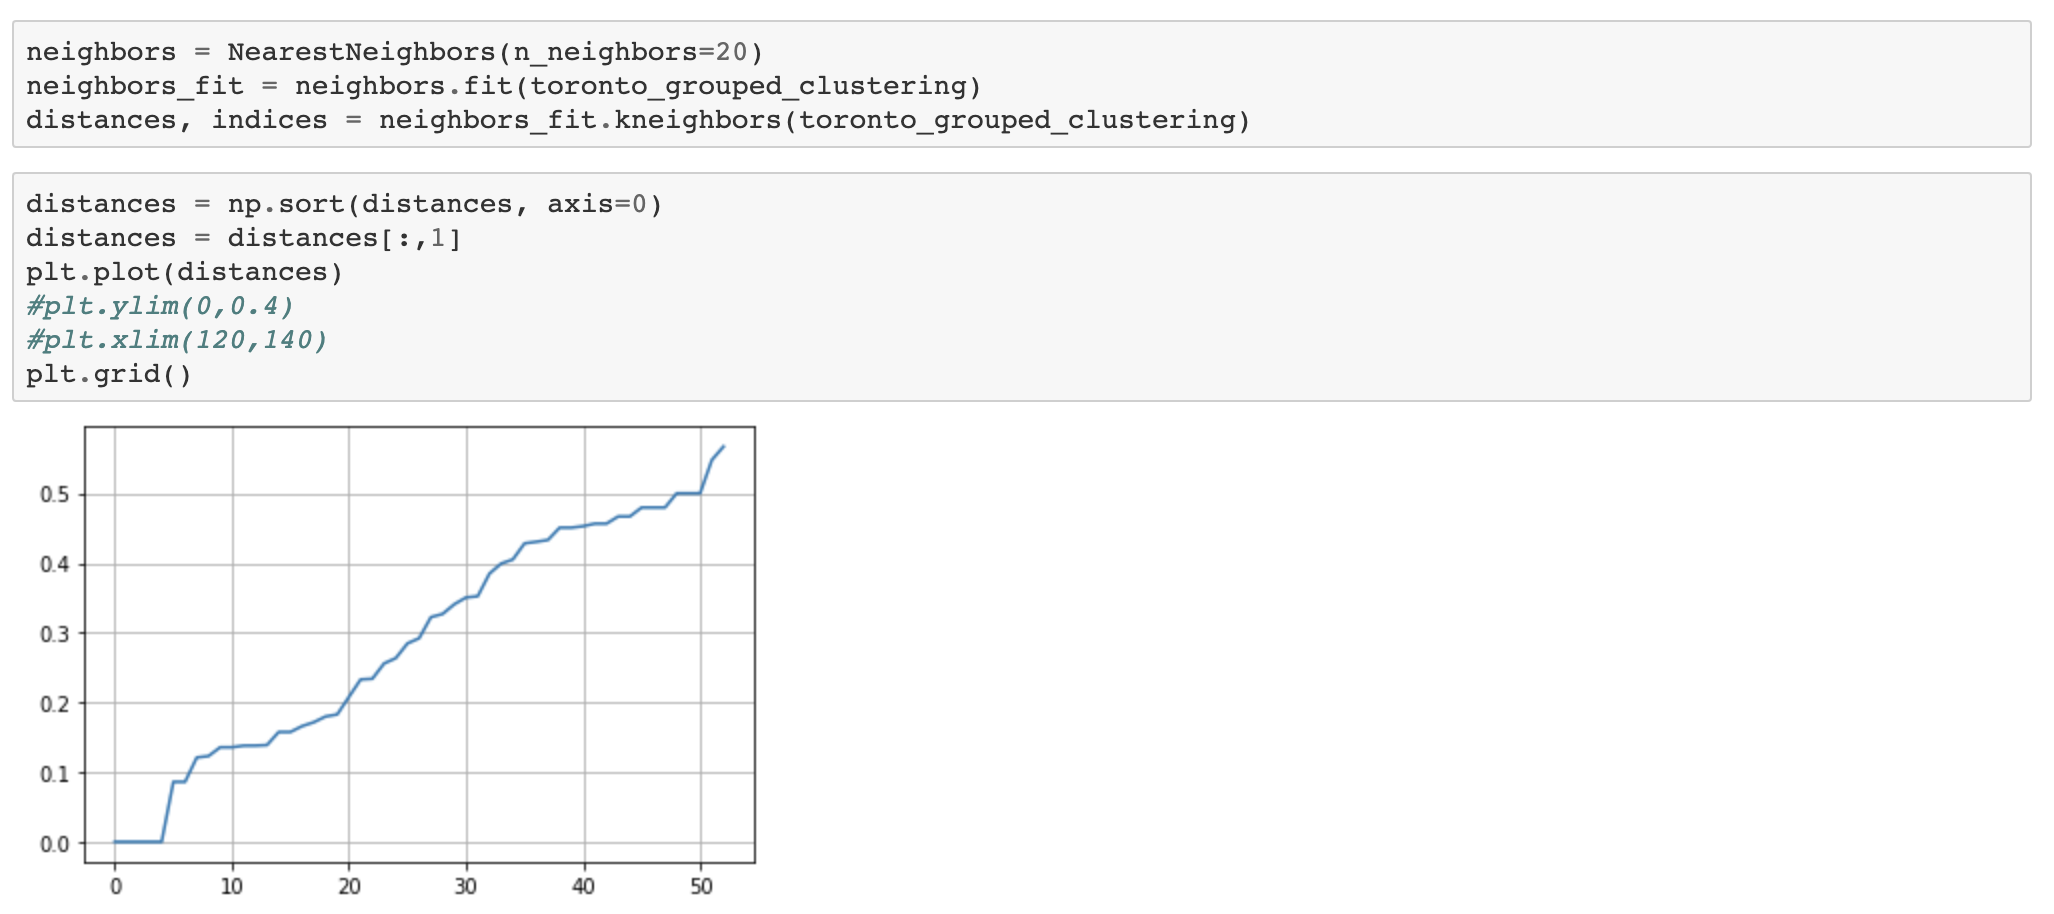
            
        II) Minimum samples: Calculated as the average number of venues per neighbourhood after the filter for 'Park' as been applied for Toronto and Berlin respectively.
        
    Example for Toronto:
    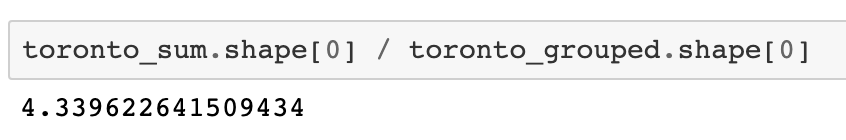
    
    
    DPSCAN results - Toronto:
   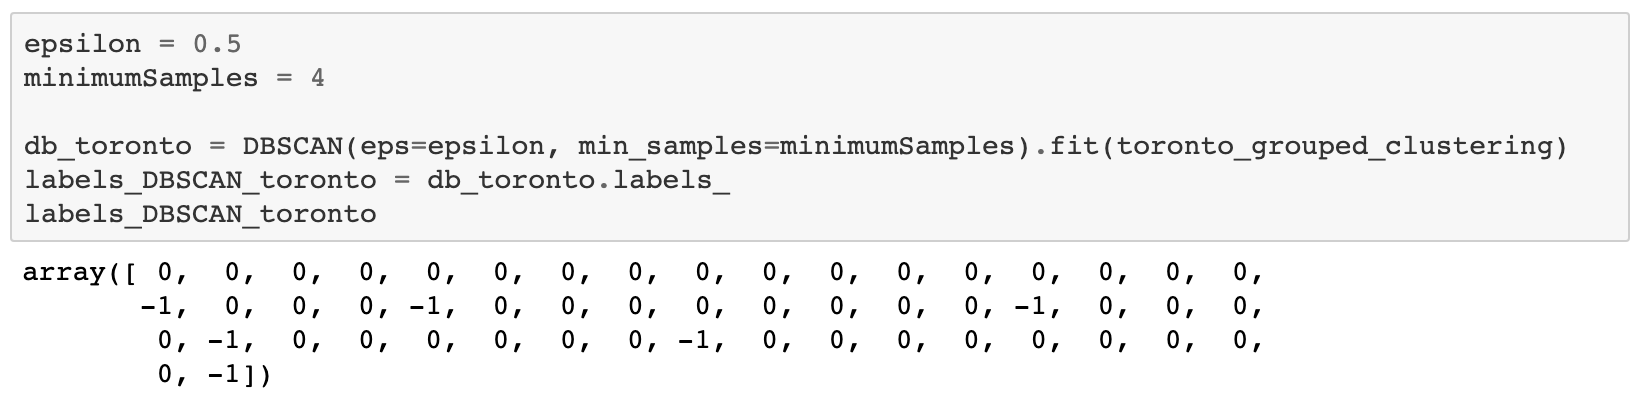
 
    b.  In a second step, the DBSCAN clusters were reviewed as follows:  
        I) Create top-10 Venues per cluster, checking cluster profiles - do they seem plausible?  
        II) Distribution of clusters. Number and size of clusters - based on experience - at least two clusters would be expected for each city - possibly with the occurrence of some smaller clusters. 
            Comparison with KMeans - are the clusters plausible? Yes! KMeans also show one larger and two (instead of one) smaller.
            
   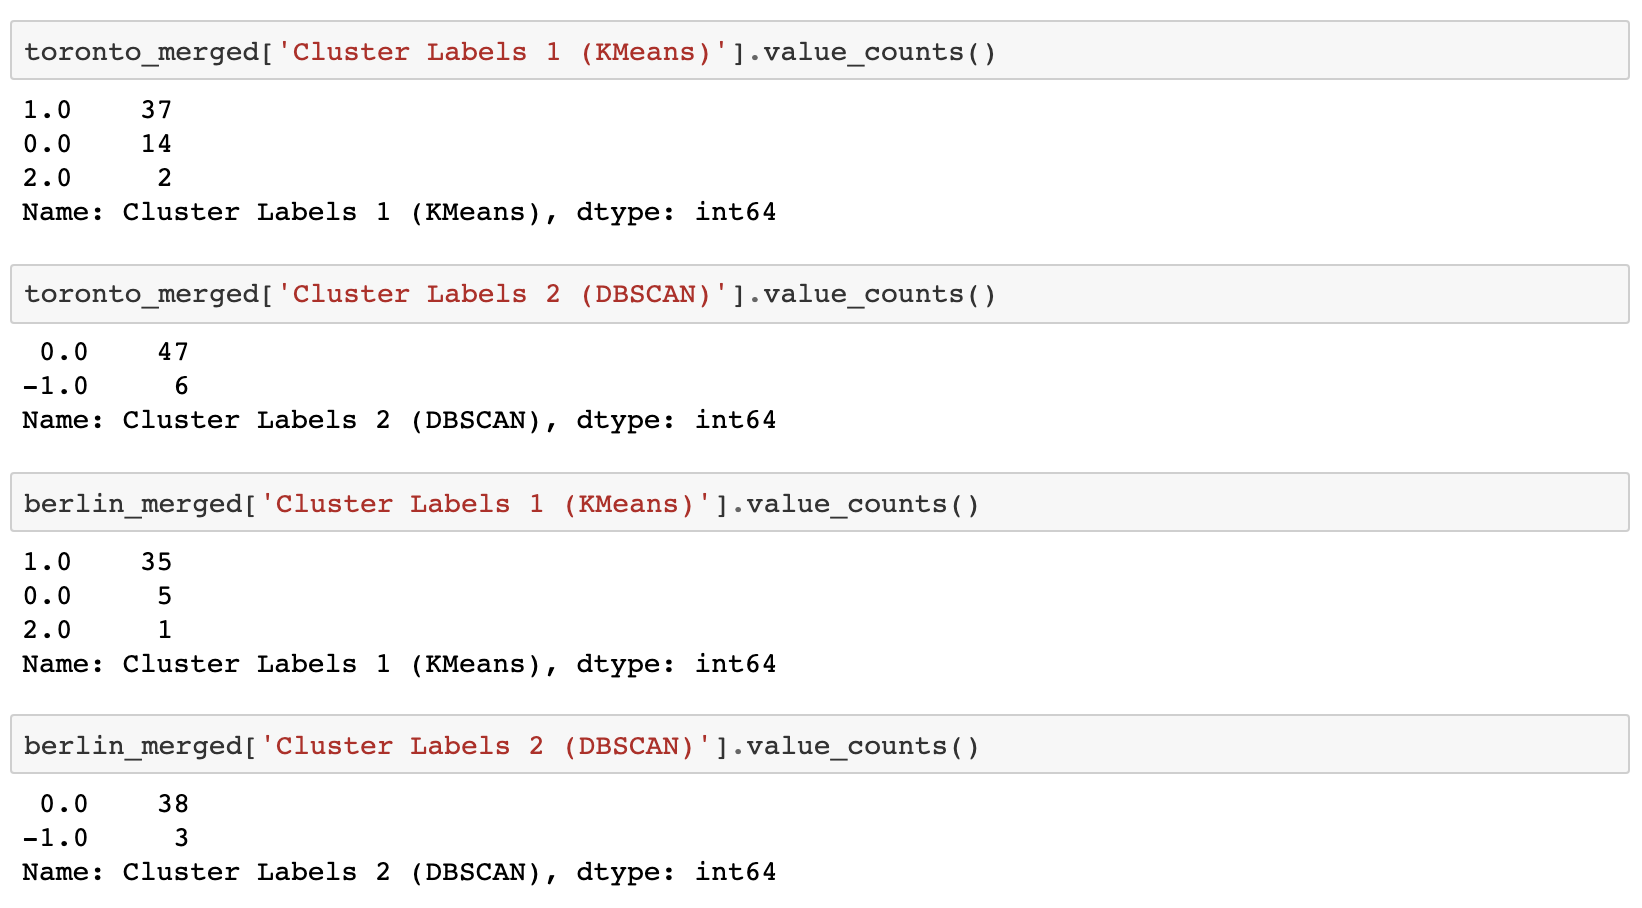
 
5. Creating bar and pie charts for main clusters. Graphical analysis of cluster structures by number and relative size of top-five venues. The following steps were carried out (the charts in the Results section below):  
    a. Create dataframes with top-10 Venues for the two largest DBSCAN-clusters for each city. These remaining clusters were deemed too small for further analysis.  
    b. Charts  
        I) Top five venues by number (bar-chart) - using the Seaborn package. All bar-charts have the same scale on the x-axis (number of venues) for comparison.  
        II) Top five shares vs. Rest of total venues (pie-chart) - using Matplotlib.

# Results

Overall, results shown below indicate small but important differences in the layout of green areas between Toronto and Berlin. Both cities have two main clusters with parks - one main cluster with a more diverse set of venues and a smaller second cluster with music and performing arts venues. However, Berlin’s main cluster seem to include more venues directed at general living such as supermarkets and bakeries.
 
Furthermore, the Berlin parks seem to be lower in numbers than in Toronto as well as relative to other (Berlin) categories. As we already know that Belrin ranks higher on green city indexes, this could point towards larger and more integrated park-areas, offering more of a “green escape” on a daily basis.
 
This is of course only a brief first-step analysis, but results point towards a radically different design regarding green areas than what is seen in Toronto. Further research is however needed, before we can draw any conclusions and investment decisions.


Charts:

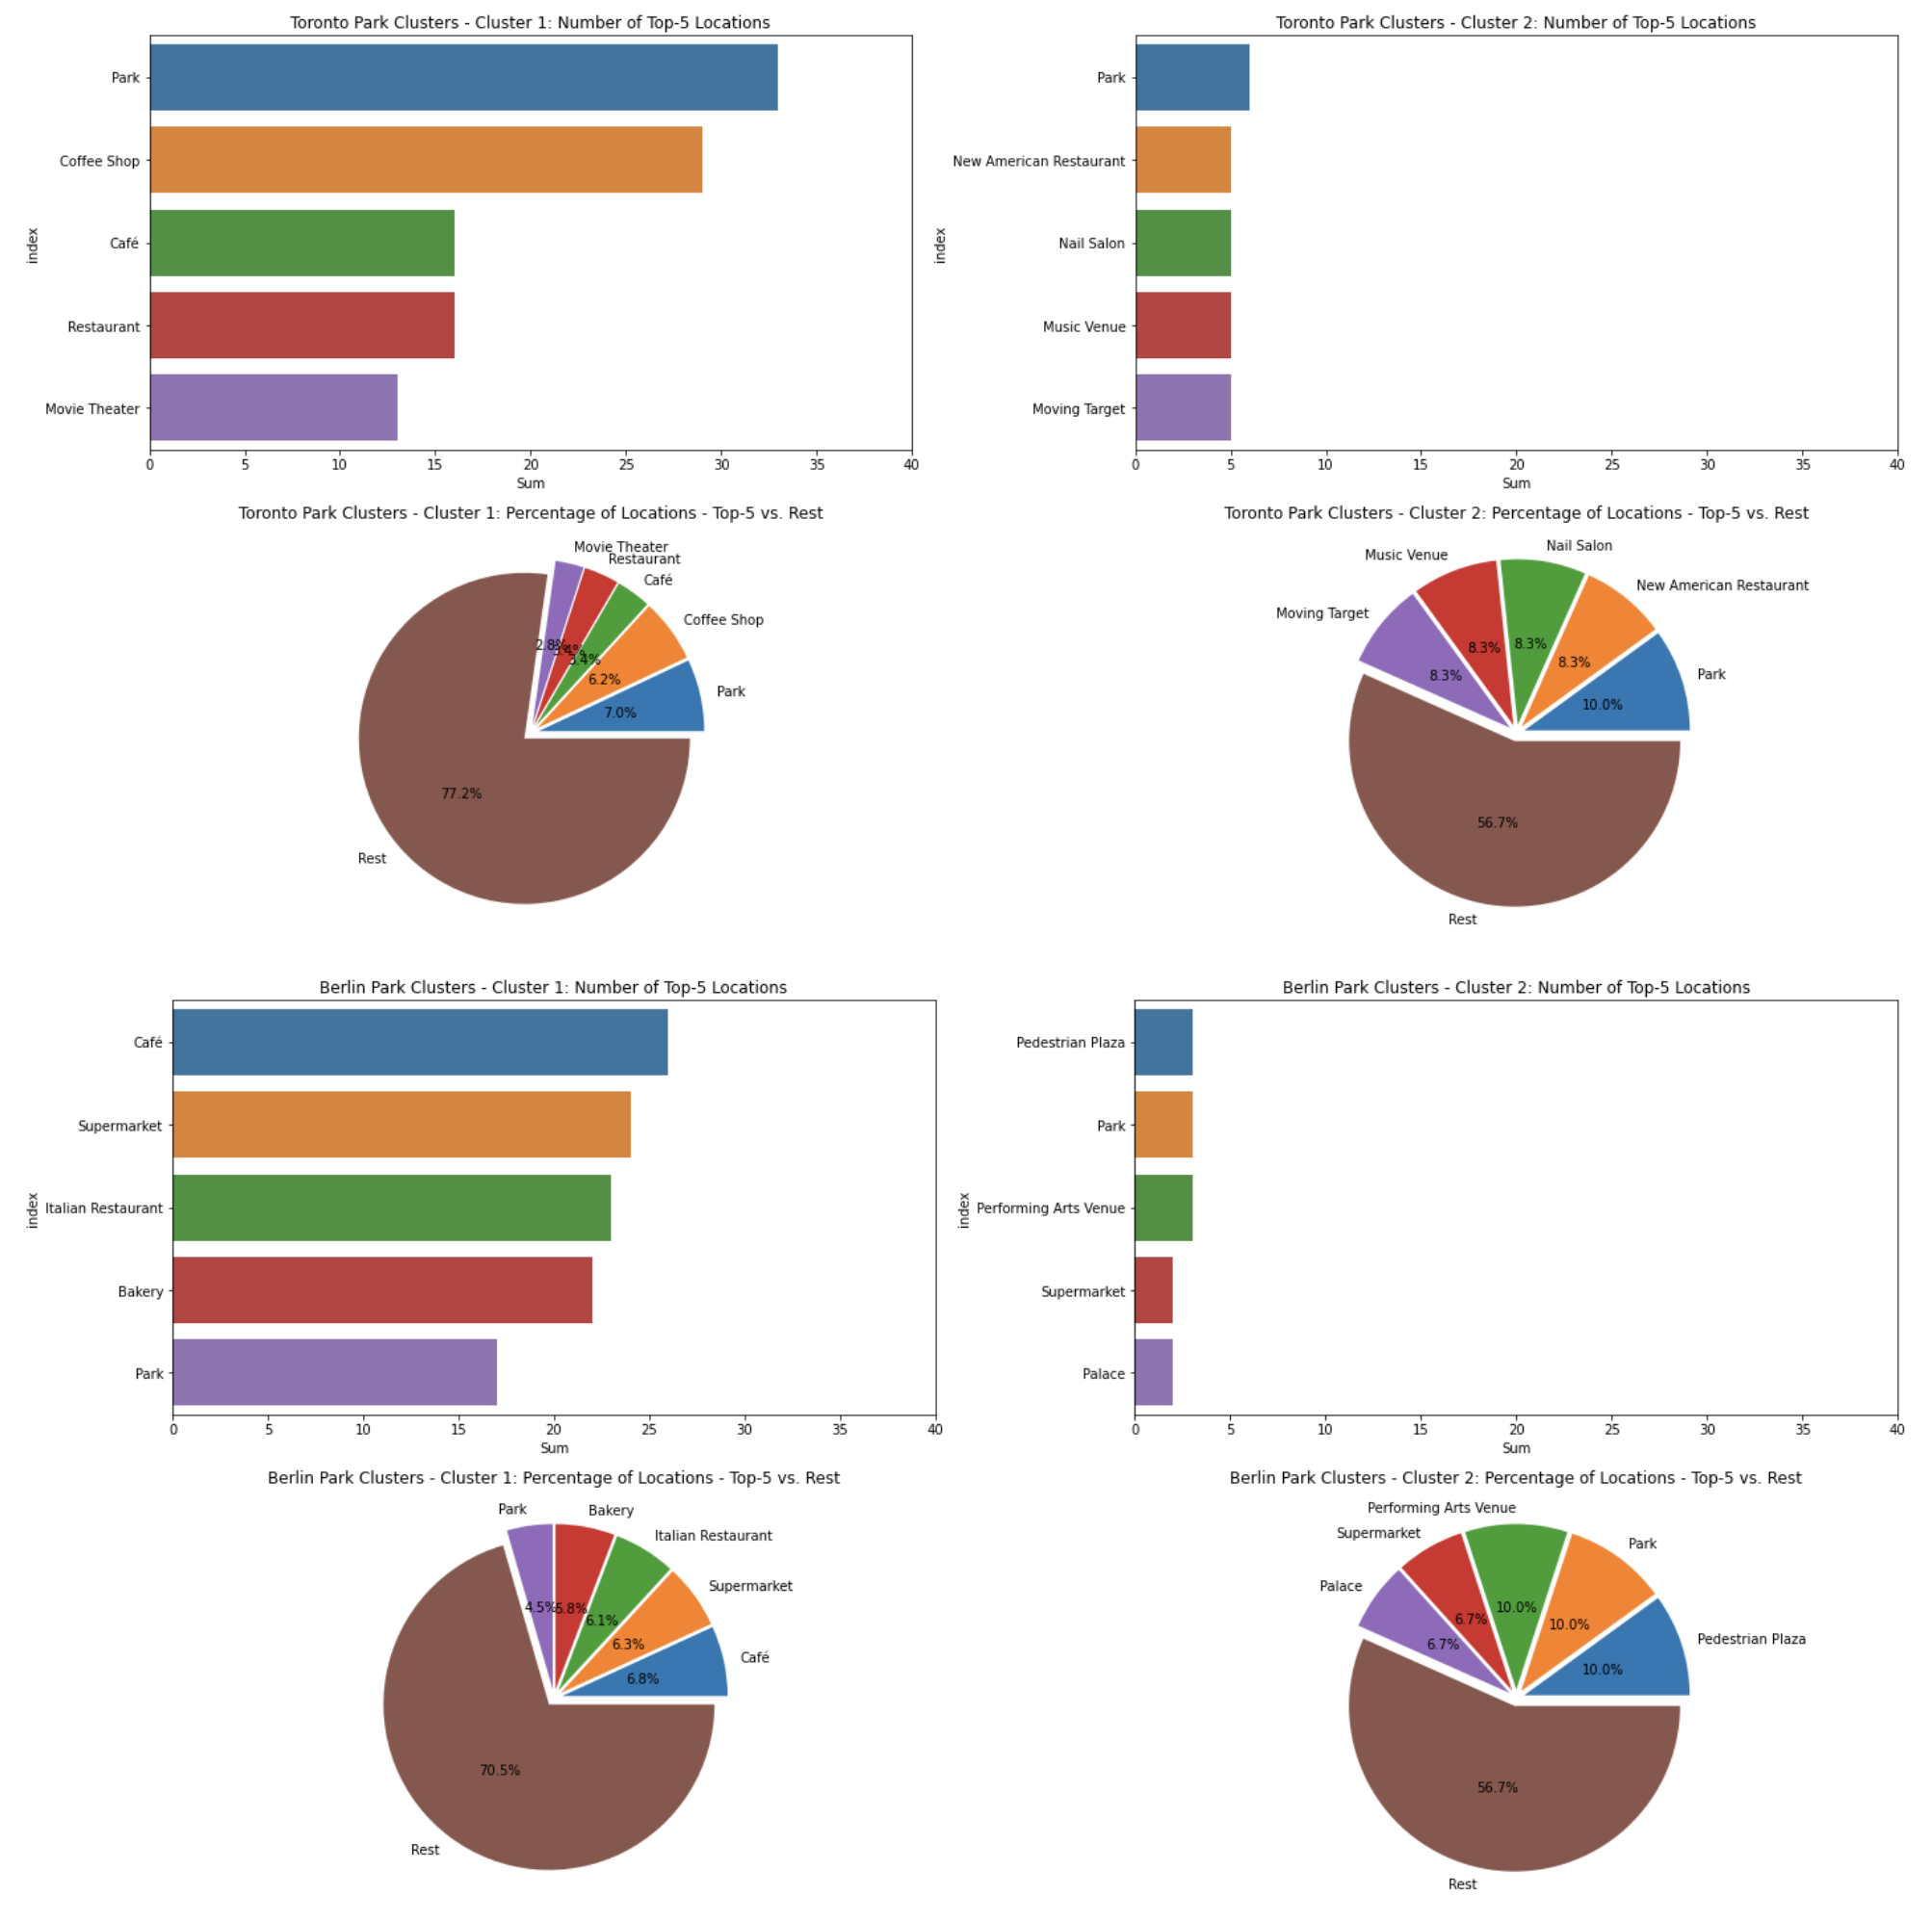

# Discussion

This is a comparison solely based on the number of venues per neighbourhood. As already mentioned, the cluster analysis ignores any differences in the size of both neighbourhoods (e.g. area and population) and venue (e.g. the size of the parks). This approach seems ok for a first evaluation, but a thorough analysis would have to go into a lot more detail.
 
Furthermore, although the venues listed by Foursquare were fairly broad, they are by no means complete. It is also a question, weather venue categories between cities on two different continents are always comparable.  This might require more investigation.
 
The DBSCAN clusering algorithm seems appropriate but is of course also not without weaknesses. Data with varying density could prove tricky to cluster. Further algorithms should be tested.
 
Last interactive dashboards could also be used in order for domain experts to explore this data themselves. This is a highly complex comparison, and jumping to conclusions based on too little data could lead to wrong investment decisions.

# Conclusion

Based on the importance of green cities, and the fact that Toronto does not rank among the best, a benchmark analysis was carried out. This analysis compared Toronto and Berlin - a similar city demographically and economically and a top performer on various green city indexes.  The goal is to identify any structural differences that could aid Toronto in its future green planning and investments.
 
As shown this was indeed the case - Berlin has a green approach which seems more integrated with general living infrastructure. This is surely based on a long-term approach and the Toronto City Council would be wise to consult with colleagues in Berlin on how best to go forward from here…